In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
x_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 1901-2010.csv",index_col=0)
x_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 2011-2022.csv",index_col=0)

In [3]:
from sklearn import svm
model = svm.SVC(C=1,coef0=0.0,degree=2,kernel='rbf',probability=True)
model.fit(x_train,y_train)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, degree=2, probability=True)

In [4]:
y_pred = model.predict(x_test)
y_pred

array([2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2], dtype=int64)

In [5]:
y_array=y_test.values.ravel()
y_array

array([2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2], dtype=int64)

In [6]:
accuracy_score(y_pred,y_array)

1.0

In [13]:
clusters=[]
for i in range(1,9):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA 8 Clusters Images\SSTA 8 Clusters Indian Rainfall Images\SSTA 8 Clusters {i} INDIAN RAINFALL.png"))
    

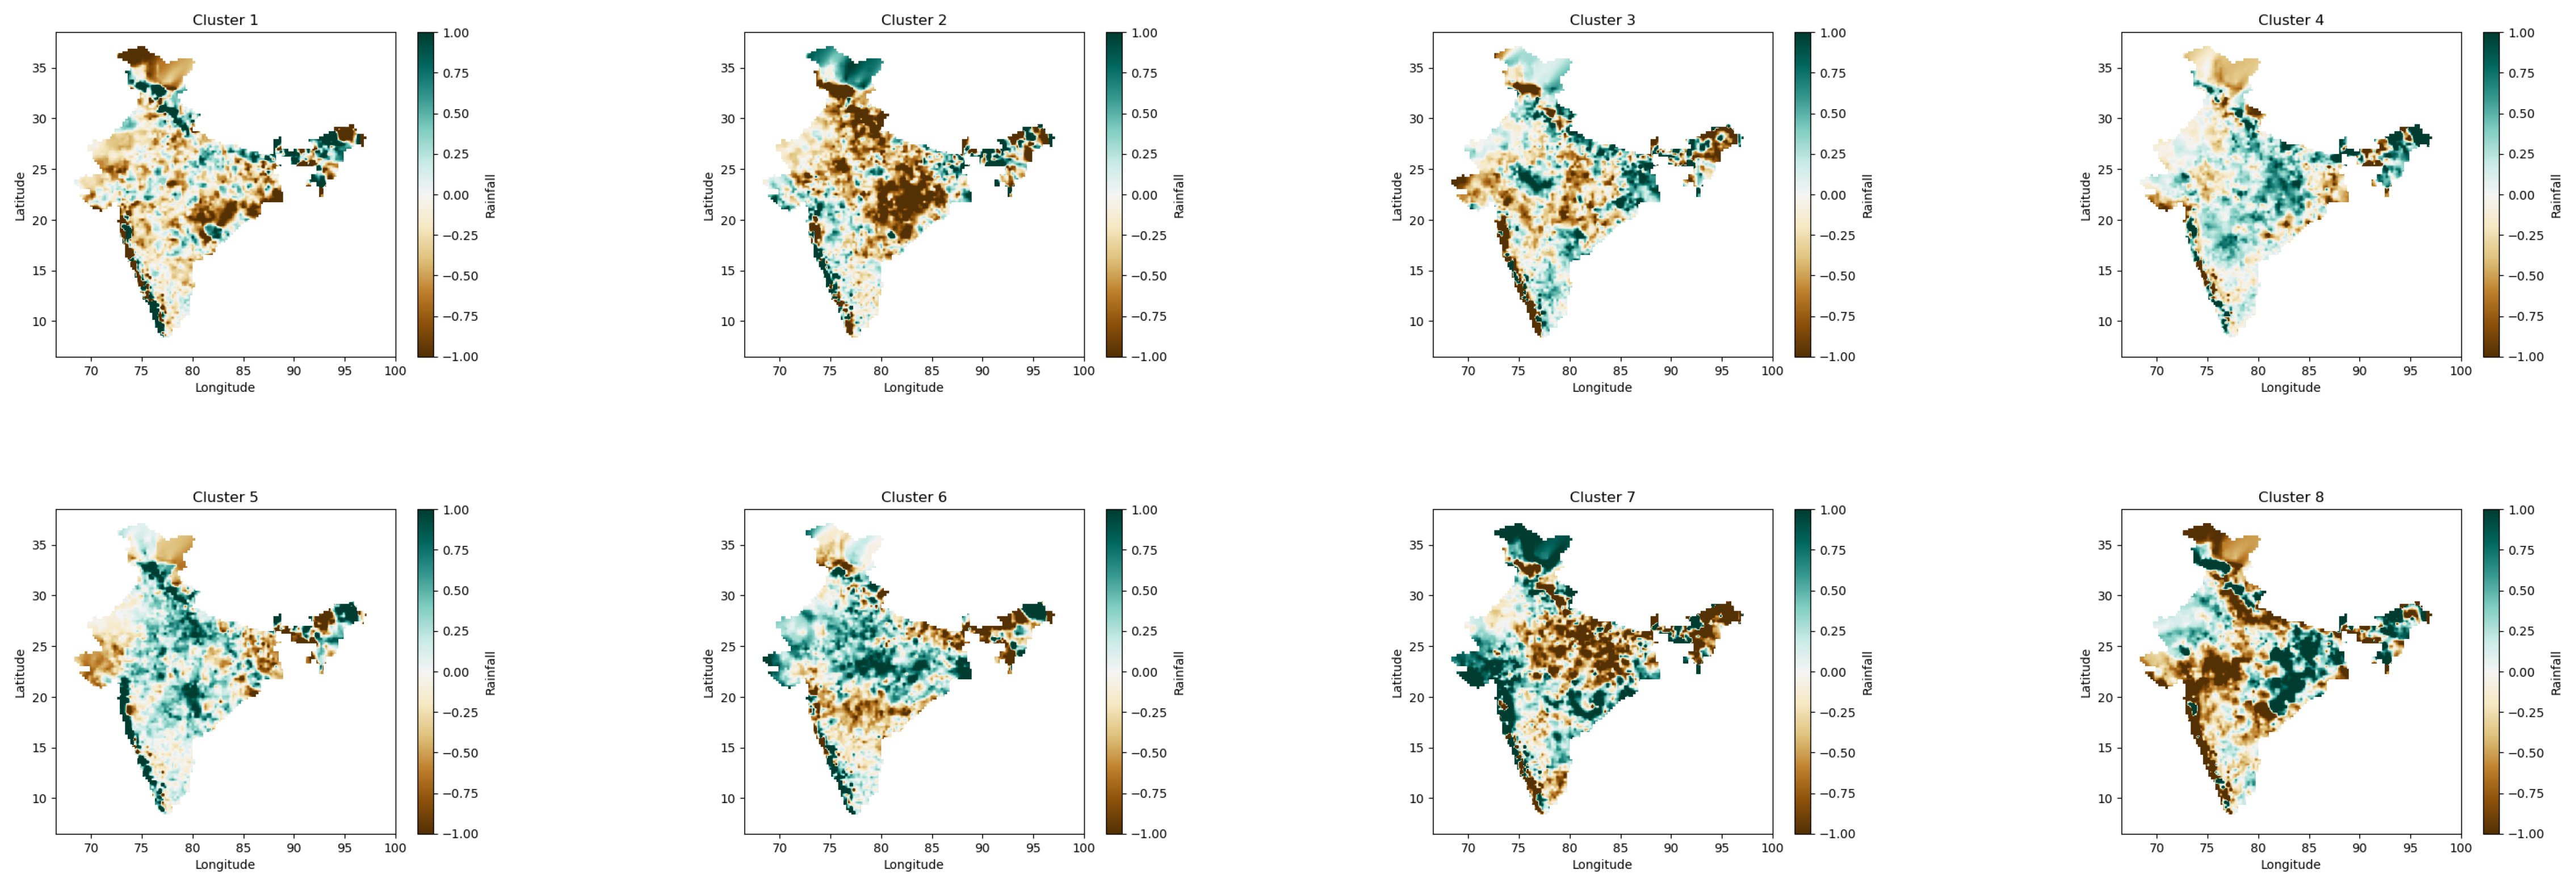

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(60, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [15]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10]

In [16]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

In [17]:
print("Predicted Cluster",y_pred)
print("Actual Cluster",y_array)

Predicted Cluster [4 4 3 6 0 1 5 2 3 3 4 6 7]
Actual Cluster [4 4 3 6 0 1 5 2 0 3 4 6 7]


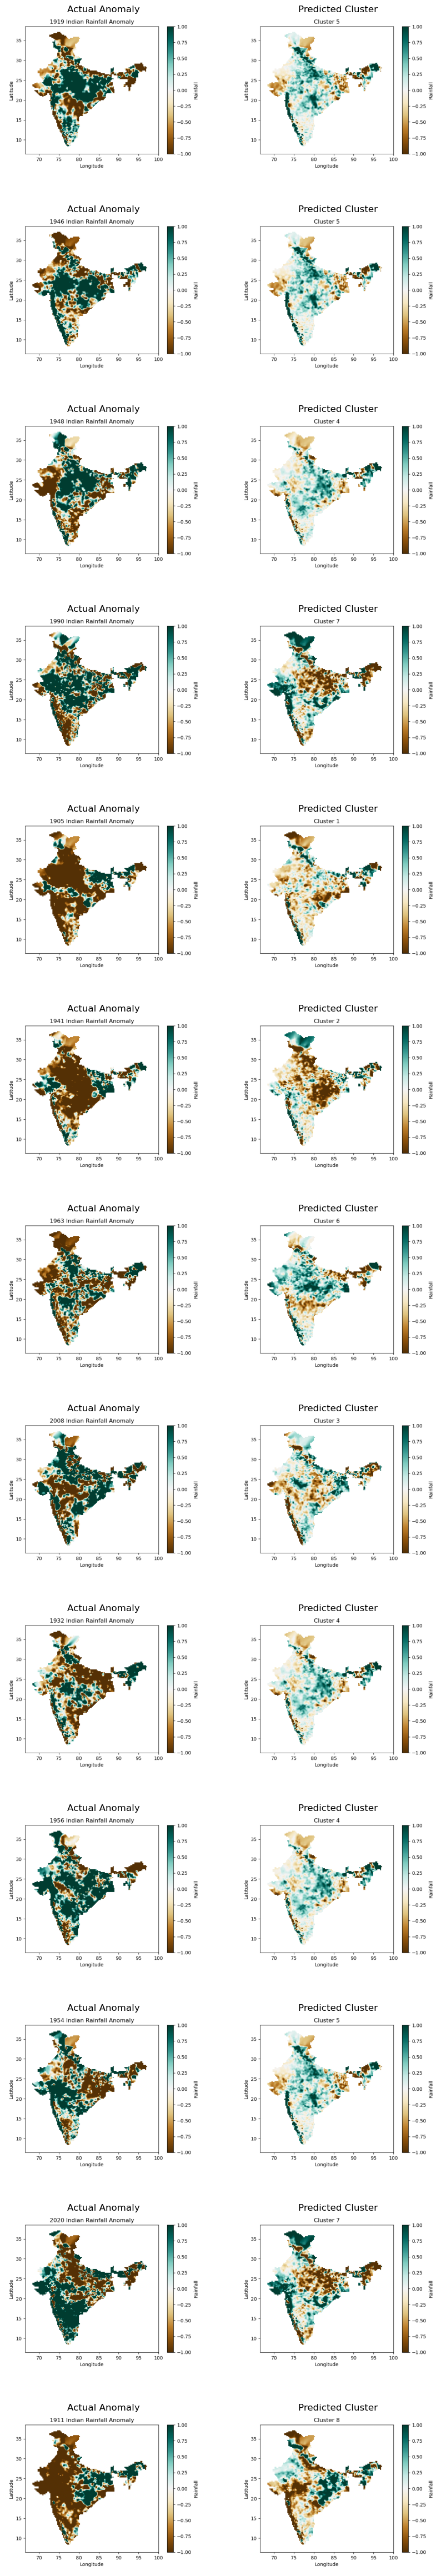

In [18]:
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


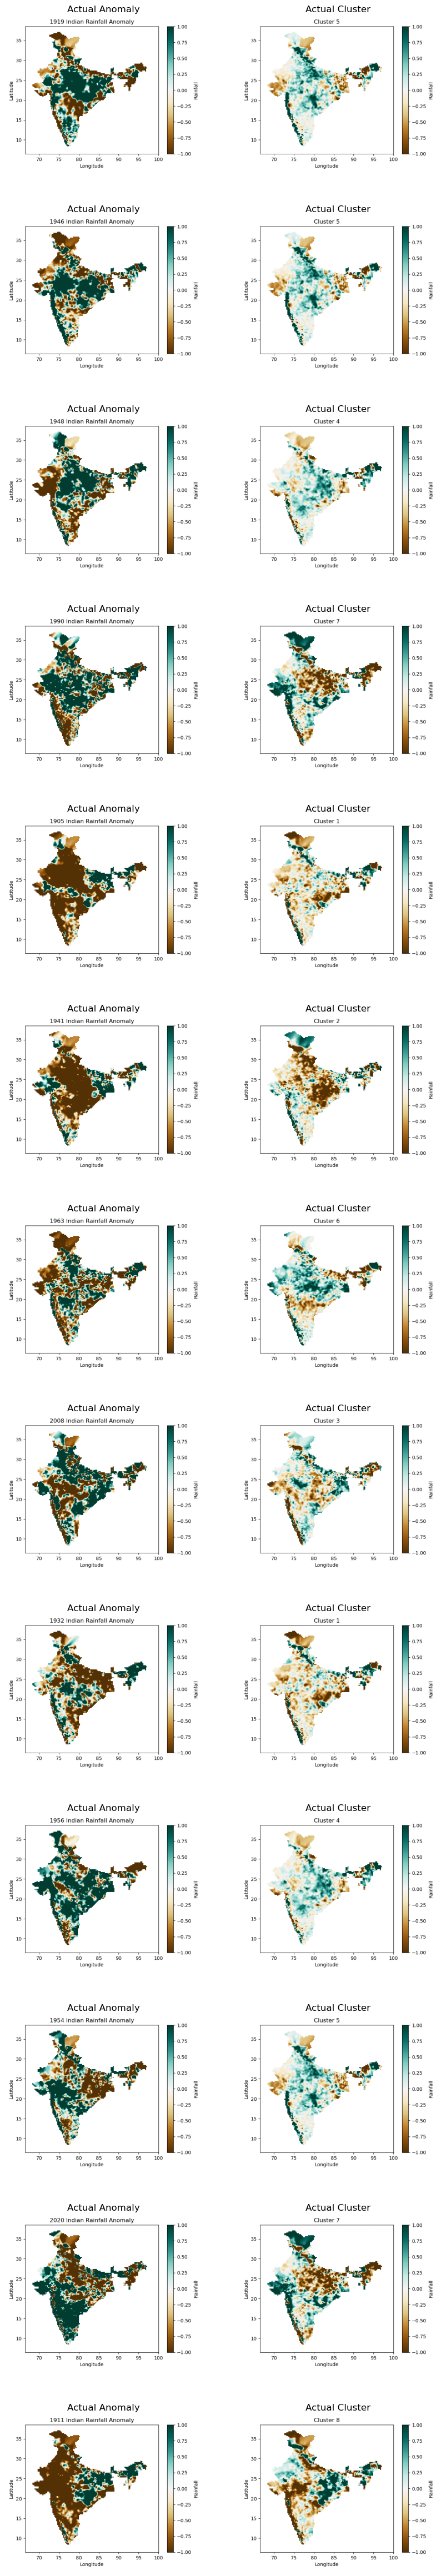

In [19]:
#Actual Years
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

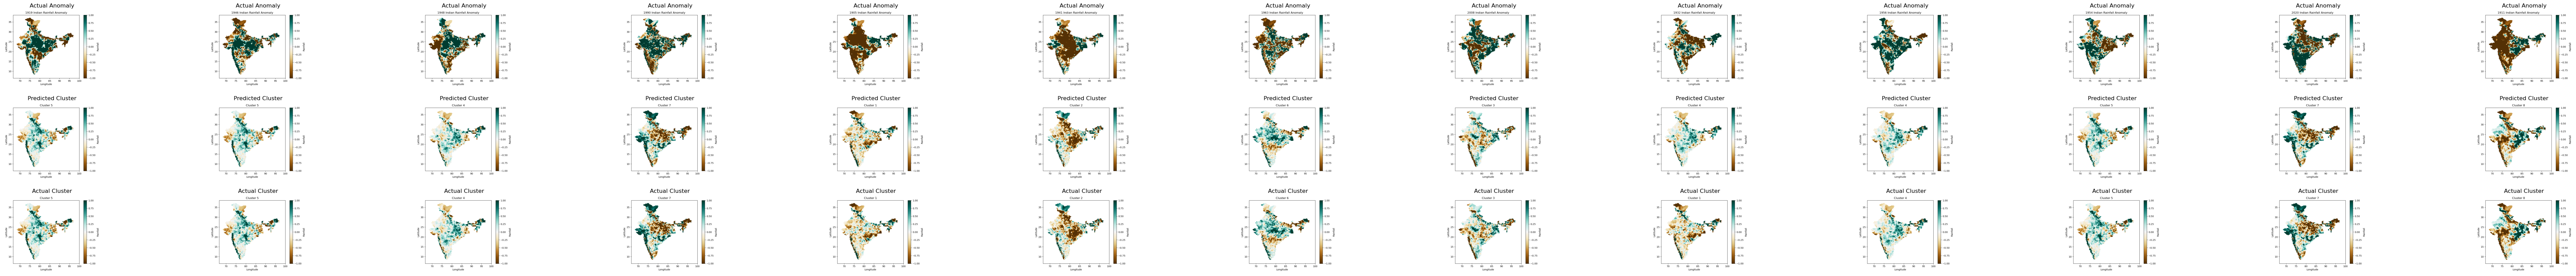

In [20]:
fig, axes = plt.subplots(3, 13, figsize=(100, 10)) 
j=0
k=0
l=0
for i, ax in enumerate(axes.ravel()):
    
   
    if(i>=0 and i<13):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')
        j+=1
        
    elif(i>=13 and i<26):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        k+=1
    elif(i>=26):
        pred_clus=y_array[l]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        l+=1
        
#     print(i,j,k,l)

# plt.savefig('SSTA 8 Clusters SVM Train Test Split Prediction.png')
